# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Load data (features)
def load_data():
    features_data = np.load("features.npy")
    normalized_data = (features_data - np.mean(features_data, axis = 0)) / np.std(features_data, axis = 0)
    #print(f"Mean: {np.mean(normalized_data, axis = 0)} and Standard Deviation: {np.std(normalized_data, axis = 0)}")
    return normalized_data


In [2]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    covar = (X.T @ X) / (len(X) - 1)
    eig_vals, eig_vecs = np.linalg.eig(covar)
    sorted_pos = np.argsort(eig_vals)[::-1]
    sorted_eig_vals = eig_vals[sorted_pos]
    sorted_eig_vecs = eig_vecs[sorted_pos]
    return (sorted_eig_vals, sorted_eig_vecs)


In [3]:
# (c) Evaluate using variance_explained as the metric
def eval():
    X = load_data()
    eig_vals, eig_vecs = eigendecomp(X)
    dims = len(X[0])
    for k in range(dims):
        feature_dims = X[:, :k+1]
        current_eig_vals = eig_vals[:k+1]
        variance_features = np.sum(current_eig_vals) / np.sum(eig_vals)
        print(f"K: {k+1} -- Variance: {variance_features} -- Eigenvalue: {eig_vals}" )      

eval()

K: 1 -- Variance: 0.588921209829577 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 2 -- Variance: 0.873989634702231 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 3 -- Variance: 0.9704560233211403 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 4 -- Variance: 0.9958074918820436 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 5 -- Variance: 0.9999999999999998 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 6 -- Variance: 0.9999999999999998 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7

The value of k that we should use is k = 3 for the sole reason that it has the closest variance at 0.97 to 1 and the higher ones will end up negatively harming our system.

In [4]:
# (d) Visualize after projecting to 2-D space
def viz():
    labels_array = []
    labels = np.load("labels.npy", allow_pickle=True)
    for i, label in enumerate(labels):
        if (i != 0  and labels[i-1] != label):
            labels_array.append(i)
    X = load_data()
    sorted_eig_vals, sorted_eig_vecs = eigendecomp(X)
    plot_x = X @ sorted_eig_vecs[:, 0:2]
    x_0 = plot_x[:labels_array[0] + 1]
    x_1 = plot_x[labels_array[0]:labels_array[1] + 1]
    x_2 = plot_x[labels_array[1]:len(plot_x)]
    
    plt.scatter(x_0[:,0], x_0[:,1], label = "label 0")
    plt.scatter(x_1[:,0], x_1[:,1], label = "label 1")
    plt.scatter(x_2[:,0], x_2[:,1], label = "label 2")
    plt.legend()
    plt.title("Data in 2-D Supspace")
    plt.show()

K: 1 -- Variance: 0.588921209829577 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 2 -- Variance: 0.873989634702231 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 3 -- Variance: 0.9704560233211403 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 4 -- Variance: 0.9958074918820436 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 5 -- Variance: 0.9999999999999998 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  4.95328615e-16  3.28557900e-16 -6.56497859e-16]
K: 6 -- Variance: 0.9999999999999998 -- Eigenvalue: [ 4.74298961e+00  2.29585309e+00  7

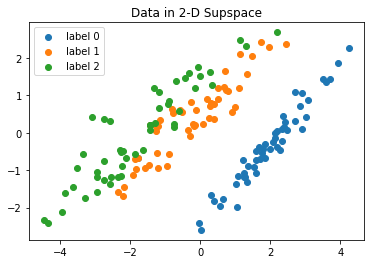

In [5]:
def main():

    eval()
    viz()

if __name__ == "__main__":
    main()

![1e](1e.png)